https://www.tensorflow.org/tutorials/images/cnn?hl=ko

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28, 1) (60000,)


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1474 - accuracy: 0.9557
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0475 - accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0207 - accuracy: 0.9932


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.0284 - accuracy: 0.9917


In [10]:
print(test_acc)

0.9916999936103821


In [11]:
import matplotlib.pyplot as plt

In [12]:
import matplotlib.image as mpimg

In [13]:
test_images[0].shape

(28, 28, 1)

In [14]:
tmp = test_images[0].reshape(28, 28)
tmp.shape

(28, 28)

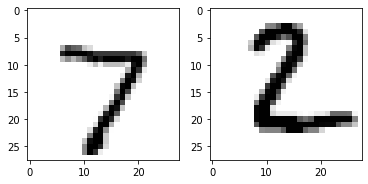

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.subplot(1, 2, 2)
plt.imshow(test_images[1].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [16]:
pred = model.predict(test_images[0:2])

In [17]:
pred[1]

array([5.6754939e-09, 6.7506323e-10, 1.0000000e+00, 1.3595895e-14,
       3.9014649e-09, 1.4055857e-15, 4.3224921e-09, 1.5759728e-10,
       1.1768743e-09, 3.6950093e-13], dtype=float32)

In [18]:
import numpy as np

In [19]:
np.argmax(pred[0]), np.argmax(pred[1])

(7, 2)

In [20]:
test_images[0:2].shape

(2, 28, 28, 1)